<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New classfacation

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/Prerocced1_data.csv')


print(data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140        289.0          0           1   
1     49    0              2        160        180.0          0           1   
2     37    1              1        130        283.0          0           2   
3     48    0              0        138        214.0          0           1   
4     54    1              2        150        195.0          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110        264.0          0           1   
914   68    1              0        144        193.0          1           1   
915   57    1              0        130        131.0          0           1   
916   57    0              1        130        236.0          0           0   
917   38    1              2        138        175.0          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear


Information Gain (Entropy):

Splitting Data into: 70% Training and 30% Test

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

fn= data.keys().tolist()[:-1]
X= data[fn]
y=data['HeartDisease']
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

# Initialize the Decision Tree Classifier using entropy as criterion
classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict labels for the test dataset
y_pred = classifier.predict(X_test)

[[ 91  18]
 [ 45 122]]


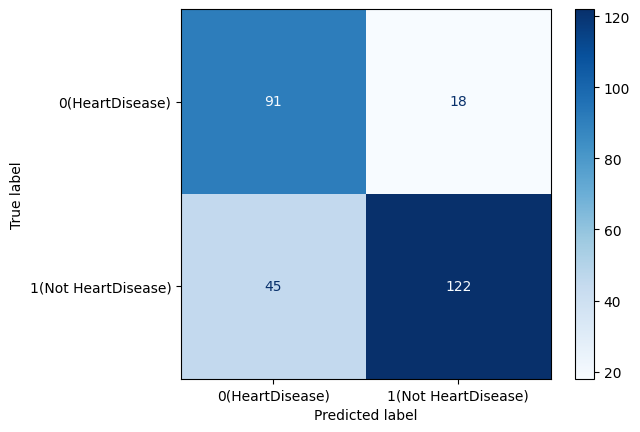

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define custom class labels for display
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create the ConfusionMatrixDisplay with the custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[class_labels[0], class_labels[1]])

# Plot the confusion matrix using the 'Blues' colormap
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

Top-left (True Positive, TP = 91): 91 cases were accurately classified as "HeartDisease."

Top-right (False Negative, FN = 18): 18 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

Bottom-left (False Positive, FP = 45): 45 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

Bottom-right (True Negative, TN = 122): 122 cases were correctly classified as "Not HeartDisease."

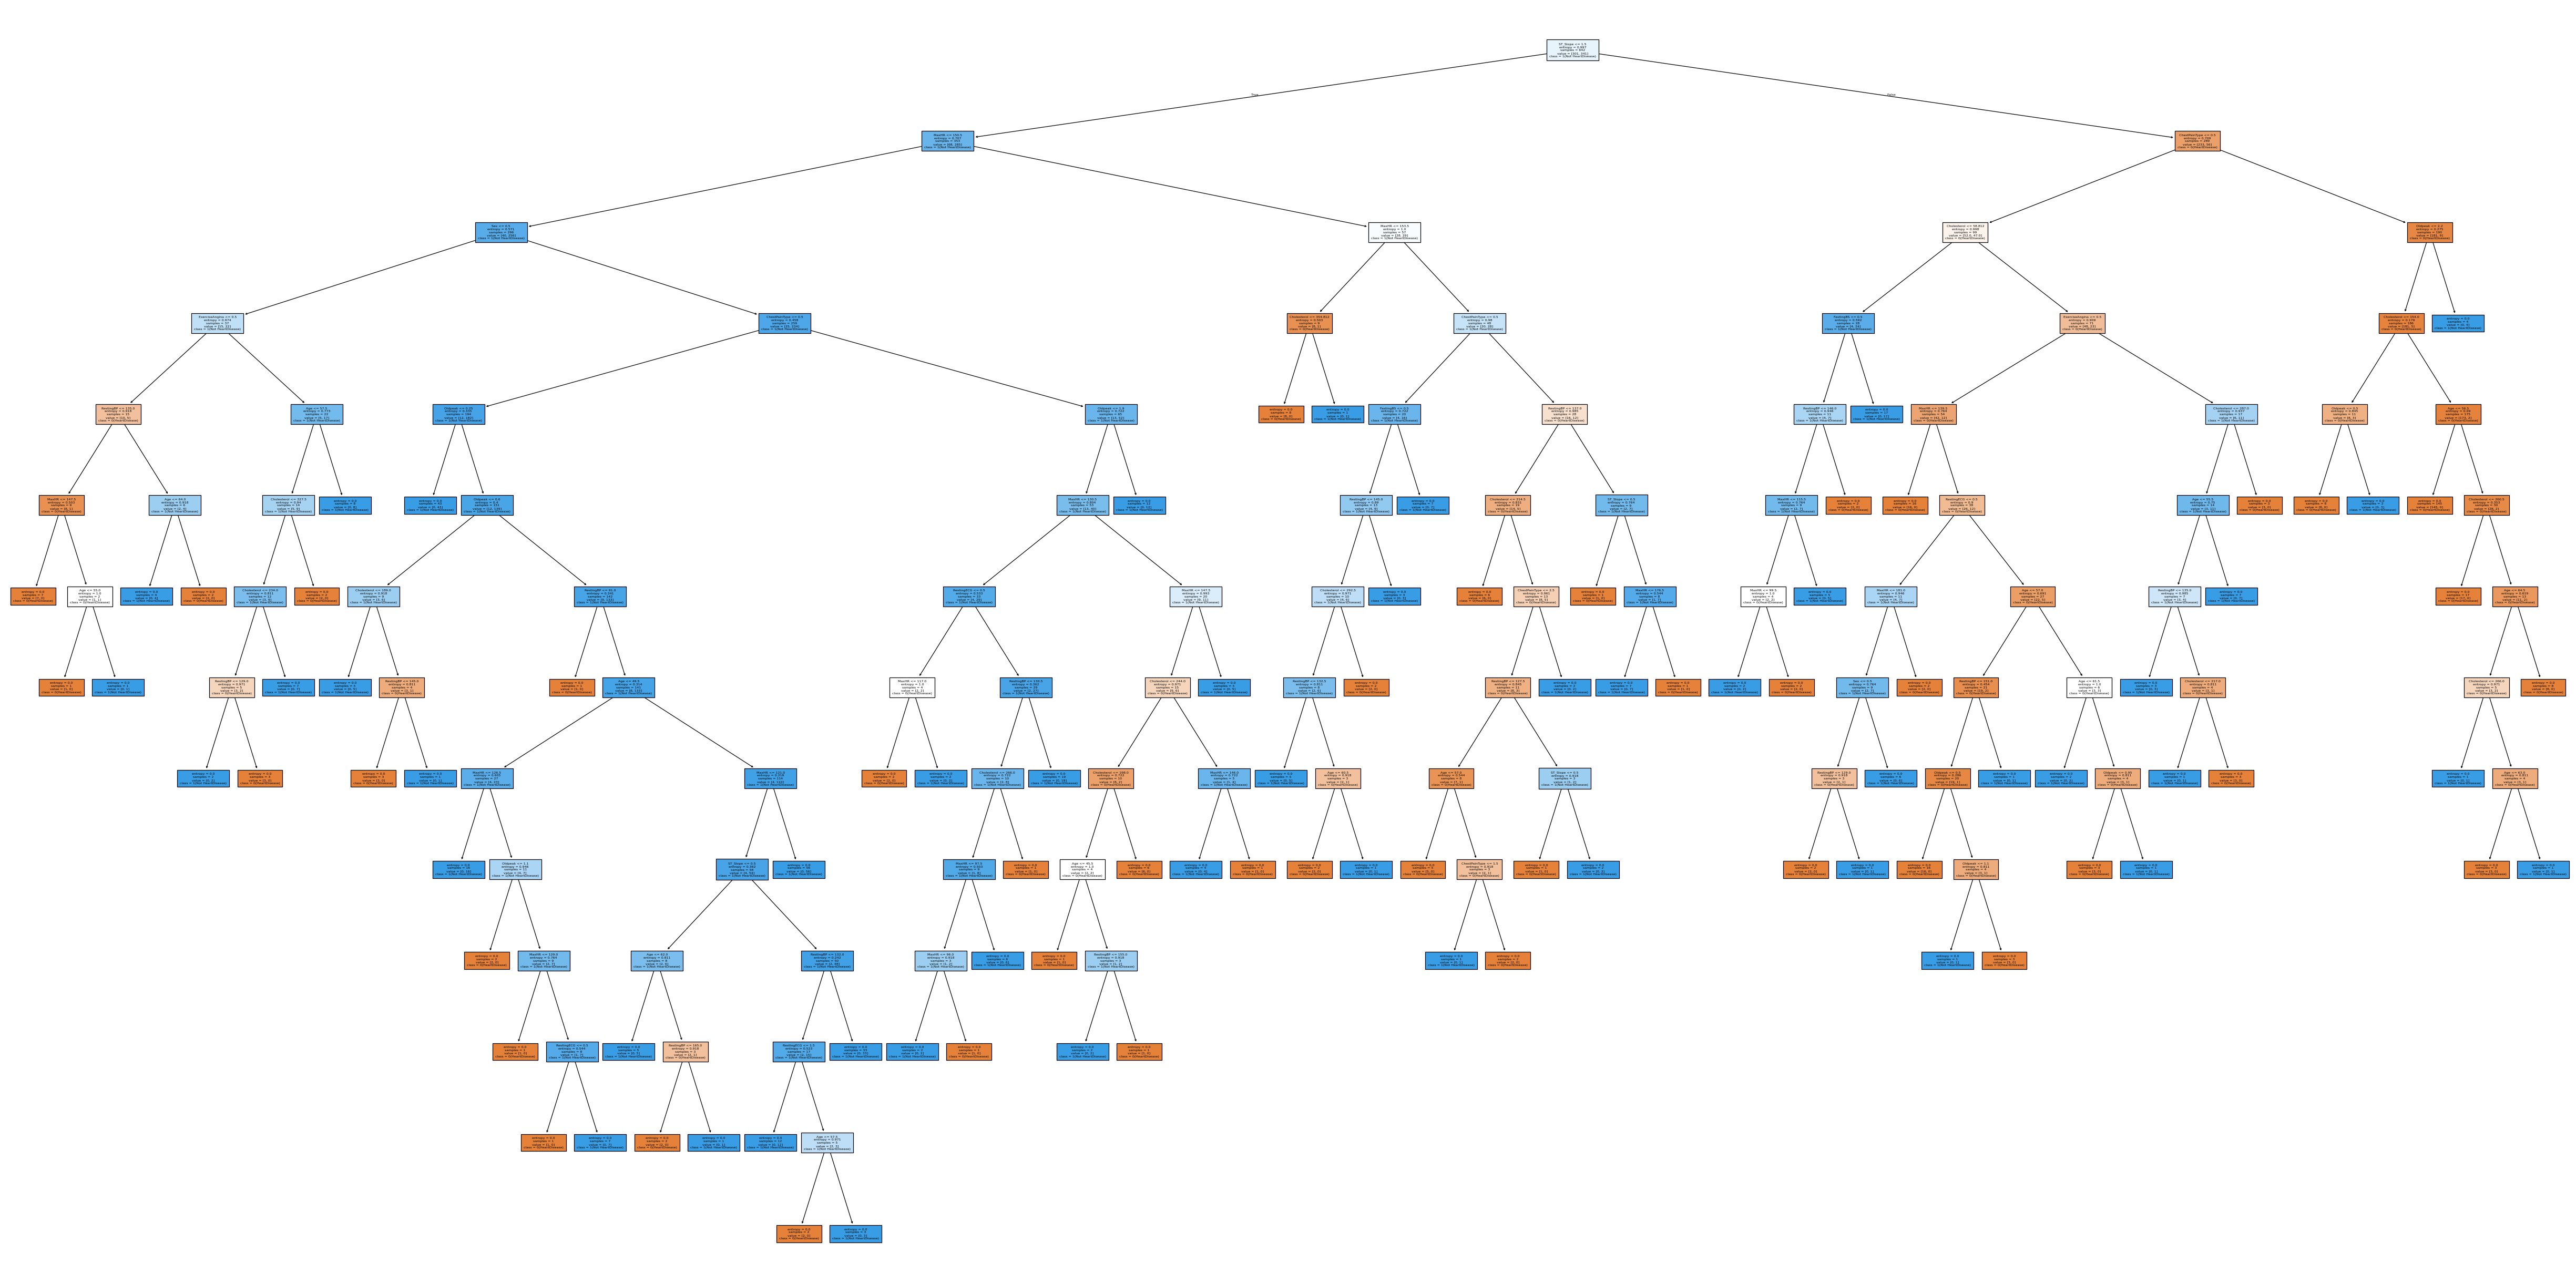

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(70, 35), dpi=90)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Plot the decision tree using the trained classifier 'classifier' # Changed clf to classifier
tree.plot_tree(
    classifier, # Changed clf to classifier
    feature_names=fn,
    class_names=[class_labels[0], class_labels[1]],
    filled=True,
    fontsize=5,    # big text = bigger box
    ax=ax
)

# Display the plot
plt.show()

1. Initial Split (Overall)

The tree starts by splitting on ST_Slope ≤ 1.5, which means this feature was the most useful for separating patients with and without heart disease. This first split creates two main groups: one with higher risk (low ST_Slope) and one with lower risk (higher ST_Slope). This shows that ST_Slope is the strongest predictor in your dataset.

2. Subsequent Nodes (Overall)

After the first split, the tree continues dividing the data using features like ChestPainType, ExerciseAngina, and Oldpeak. These features appear often because they help the model refine the risk level of each patient. The deeper splits use additional attributes to improve accuracy, but they contribute less than the main ones at the top.

3. Leaf Nodes (Overall)

At the bottom of the tree, each leaf node represents the final predicted class. Orange leaves correspond to HeartDisease, while blue leaves represent Not HeartDisease. Patients reach these leaves based on the combination of feature conditions above them. Many leaves are pure, showing that the tree confidently separates high-risk and low-risk patients.

In [8]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm2)

# Calculate Accuracy and Error Rate
accuracy = metrics.accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = cm2[1, 1]
TN = cm2[0, 0]
FP = cm2[0, 1]
FN = cm2[1, 0]

# Compute Sensitivity (Recall), Specificity, and Precision
sensitivity = TP / (TP + FN)   # Recall: TP / (TP + FN)
specificity = TN / (TN + FP)
precision   = TP / (TP + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)


Confusion matrix:
 [[ 91  18]
 [ 45 122]]
Accuracy: 0.7717391304347826
Error Rate: 0.2282608695652174
Sensitivity: 0.7305389221556886
Specificity: 0.8348623853211009
Precision: 0.8714285714285714


Accuracy:

Indicates the percentage of total predictions the model classified correctly. The model reached an accuracy of 77.17%, meaning it correctly predicted about 77% of all cases.

Error Rate:

Represents the percentage of predictions that were incorrect. The error rate is approximately 22.83%.

Sensitivity (Recall):

Shows the model’s effectiveness in identifying true cases of heart disease. The sensitivity is 73.05%, suggesting the model successfully captures most positive (heart disease) cases.

Specificity:

Measures how accurately the model identifies individuals who do not have heart disease. With a specificity of 83.49%, the model performs strongly in recognizing true negative cases.

Precision:

Reflects how many of the model’s positive predictions were actually correct. The precision is 87.14%, indicating that predictions labeled as heart disease are highly reliable.

Outcomes:

The model delivers a solid  accuracy of (77.17%).

With a sensitivity of 73.05%, it is effective at identifying individuals who truly have heart disease.

Its specificity of 83.49% demonstrates strong ability to correctly recognize those without the condition.

The high precision (87.14%) shows that when the model predicts heart disease, it is usually correct.


Splitting Data into: 60% Training and 40% Test:

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data: 60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Initialize the Decision Tree classifier using Information Gain (entropy)
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier on the training data
clf3.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf3.predict(X_test)

Confusion Matrix:
 [[120  33]
 [ 51 164]]


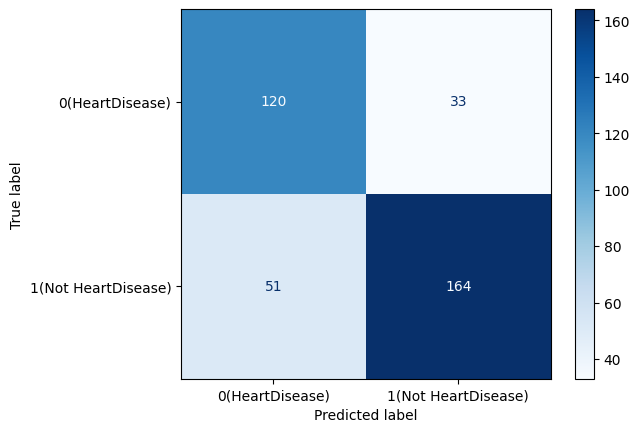

In [10]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm3)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create and plot the confusion matrix display using the 'Blues' colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

Top-left (True Positive, TP = 120): 120 cases were accurately classified as "HeartDisease."

Top-right (False Negative, FN = 33): 33 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

Bottom-left (False Positive, FP = 51): 51 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

Bottom-right (True Negative, TN = 164): 164 cases were correctly classified as "Not HeartDisease."

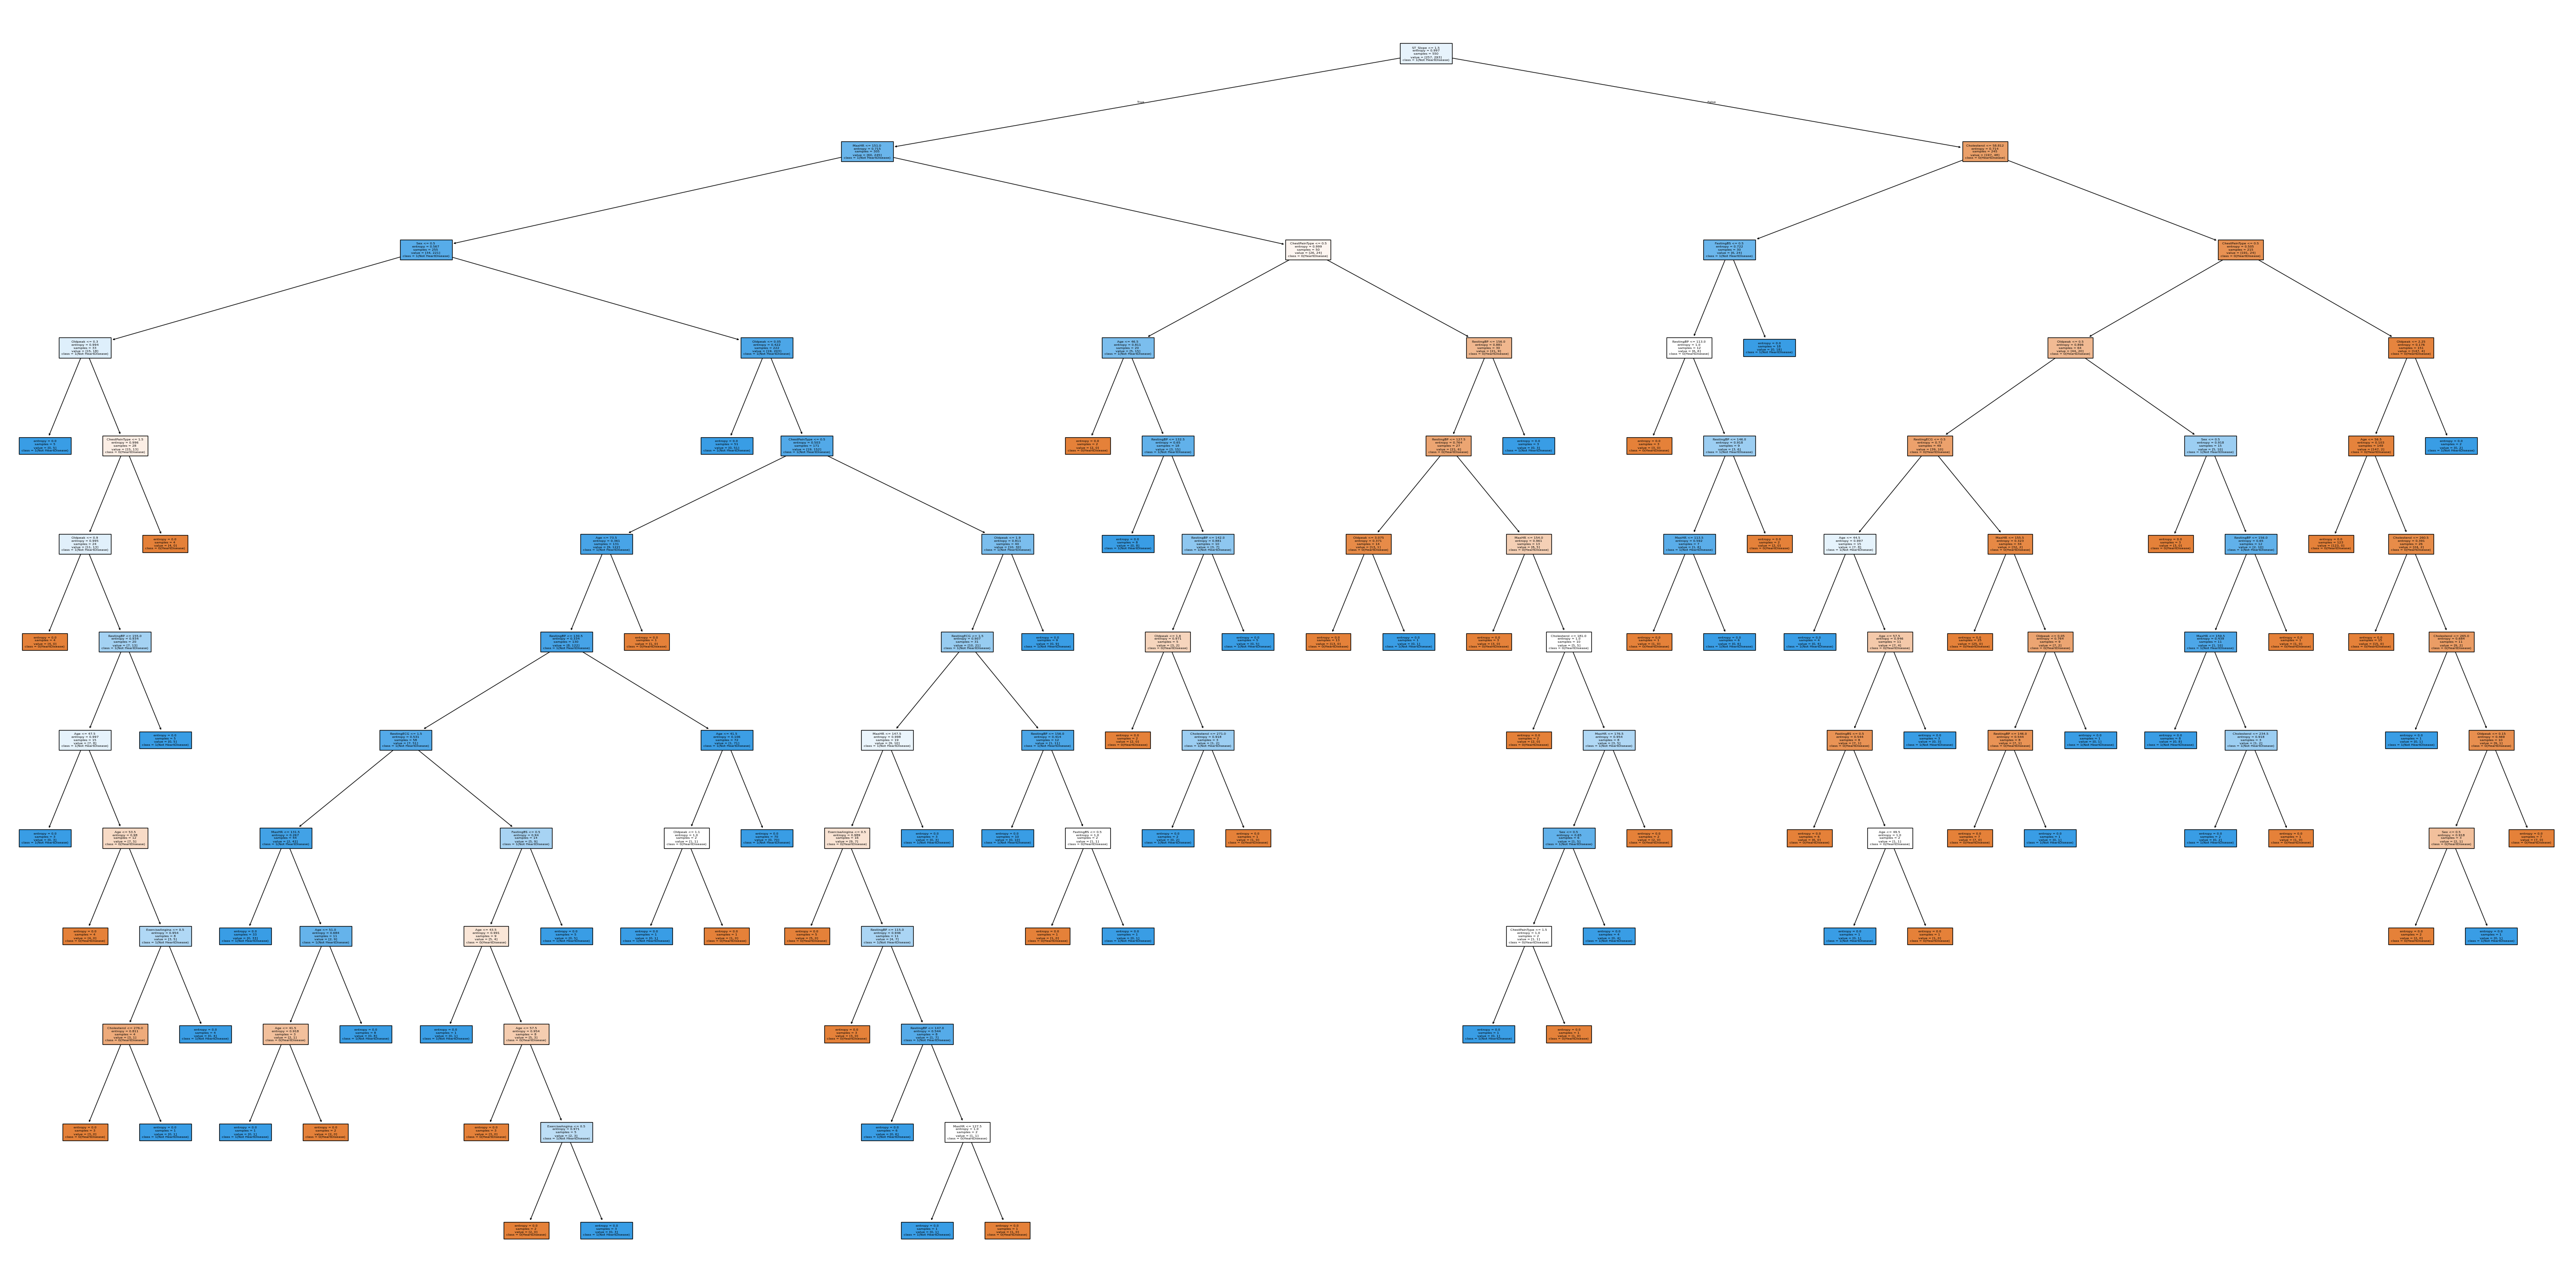

In [16]:


import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axis with the specified size and resolution
fig, ax = plt.subplots(figsize=(70, 35), dpi=90)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Plot the decision tree using clf3, with feature names and custom class labels, and fill the nodes with colors
tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True,
               fontsize=5,
               ax=ax)

# Display the plot
plt.show()

1. Initial Split (Overall)

The decision tree begins with ST_Slope ≤ 1.5 as the very first split, showing that this feature provides the highest information gain in the dataset. The root node contains 550 samples, and although the class distribution is slightly balanced, the model identifies ST_Slope as the most effective way to separate the two groups. Patients with lower ST_Slope values tend to have patterns associated with higher heart disease risk, while higher values usually relate to healthier cardiac activity. This makes ST_Slope the most influential feature in this tree.

2. Subsequent Nodes (Overall)

After the tree splits on ST_Slope, it continues refining predictions using attributes such as ChestPainType, ExerciseAngina, and Oldpeak. These features help the tree separate patients by symptoms and stress-test behavior, making the classification more accurate. They appear often in the upper and middle layers because they add strong predictive value, while other attributes appear deeper in the tree to fine-tune decisions.

3. Leaf Nodes (Overall)

The leaves at the bottom represent the final classifications: orange nodes indicate HeartDisease and blue nodes indicate NotHeartDisease. Each patient reaches a leaf based on the combinations of conditions from the splits above. Many leaves show clear dominance of one class, meaning the model reaches confident predictions by the end. The overall structure shows how the model uses ST_Slope first and then additional features to separate high-risk and low-risk patients.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm3)

# Calculate and print Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print Error Rate (1 - Accuracy)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]

# Calculate and print Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Calculate and print Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Calculate and print Precision
precision = TP / (TP + FP)
print("Precision:", precision)


Confusion matrix:
 [[120  33]
 [ 51 164]]
Accuracy: 0.7717391304347826
Error Rate: 0.2282608695652174
Sensitivity: 0.7627906976744186
Specificity: 0.7843137254901961
Precision: 0.8324873096446701


Accuracy:

Represents the percentage of all predictions the model correctly classified. The model achieved an accuracy of 77.17%, meaning it accurately predicted about 77% of all cases.

Error Rate:

Indicates the percentage of incorrect predictions. The model’s error rate is approximately 22.83%.

Sensitivity (Recall):

Measures how effectively the model identifies actual heart disease cases. With a sensitivity of 76.28%, the model successfully detects most true positive cases.

Specificity:

Shows how well the model identifies individuals without heart disease. The specificity is 78.43%, demonstrating solid performance in recognizing true negative cases.

Precision:

Reflects how many of the model’s positive predictions were correct. The precision score is 83.25%, which means that when the model predicts heart disease, it is correct the vast majority of the time.

Overall Outcomes:

The model maintains strong overall accuracy (77.17%).

With 76.28% sensitivity, it reliably captures individuals who truly have heart disease.

Its 78.43% specificity shows good ability to correctly classify those without the condition.

A precision of 83.25% indicates that positive predictions made by the model are highly trustworthy.


Splitting Data into: 80% Training and 20% Test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf3 = clf3.fit(X_train, y_train)


y_pred = clf3.predict(X_test)

[[62 12]
 [31 79]]


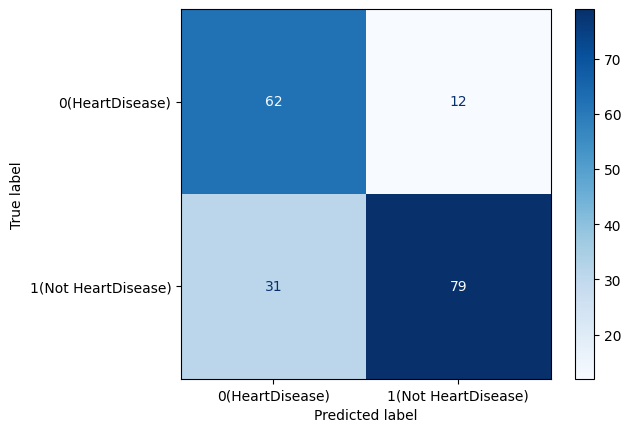

In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay

cm3 = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}


disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

Top-left (True Positive, TP = 62): 62 cases were accurately classified as "HeartDisease."

Top-right (False Negative, FN = 12): 12 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

Bottom-left (False Positive, FP = 31): 31 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

Bottom-right (True Negative, TN = 79): 79 cases were correctly classified as "Not HeartDisease."

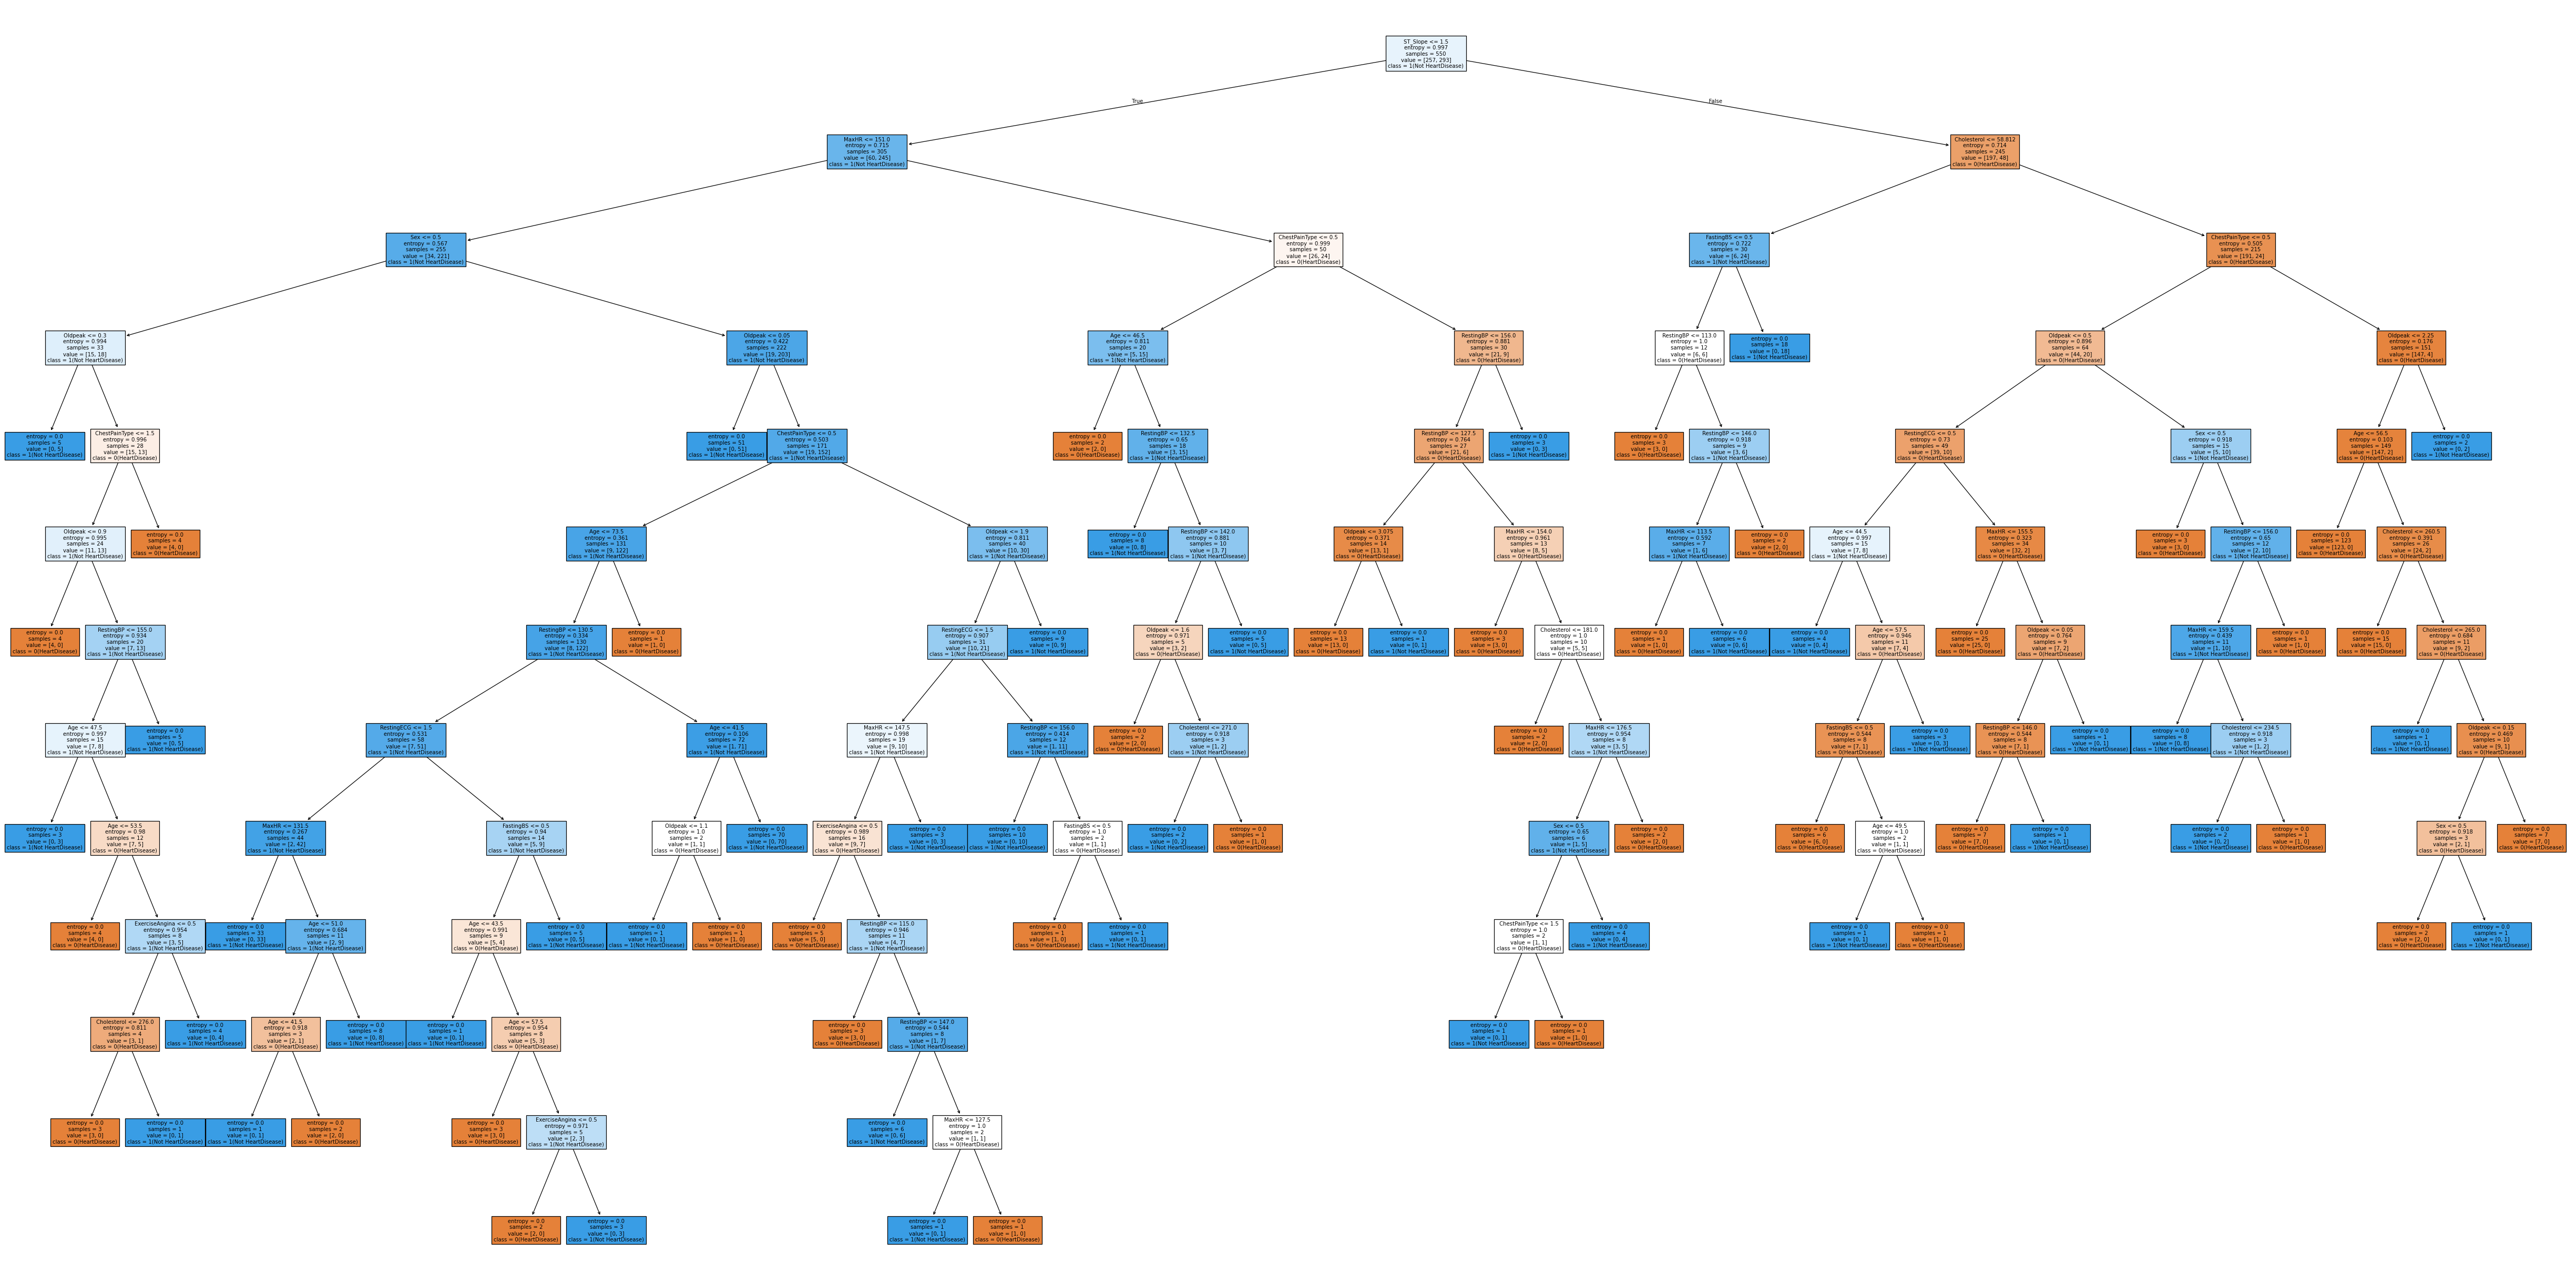

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)


class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)


confusion matrix : 
 [[62 12]
 [31 79]]
Accuracy: 0.7663043478260869
Error Rate: 0.23369565217391308
Sensitivity: 0.7181818181818181
Specificity: 0.8378378378378378
Precision: 0.8681318681318682


Accuracy:

Shows the percentage of total predictions the model classified correctly. The model reached an accuracy of 76.63%, meaning it correctly predicted a little over three-quarters of all cases.

Error Rate:

Represents the percentage of predictions that were incorrect. The model’s error rate is approximately 23.37%.

Sensitivity (Recall):

Indicates how well the model identifies actual heart disease cases. With a sensitivity of 71.82%, the model successfully detects the majority of true positive cases.

Specificity:

Measures the model’s ability to correctly recognize individuals without heart disease. The specificity is 83.78%, showing strong performance in identifying true negative cases.

Precision:

Reflects how many of the model’s positive predictions were actually correct. The precision score of 86.81% indicates that most predicted heart disease cases are accurate.

Overall Outcomes:

The model demonstrates solid overall performance, with an accuracy of 76.63%.

With 71.82% sensitivity, it effectively identifies many true heart disease cases.

The 83.78% specificity highlights the model’s reliability in detecting individuals without the condition.

A precision of 86.81% shows that the model’s positive predictions are highly dependable.


Gini Index:
Splitting Data into: 70% Training and 30% Test:

In [21]:

from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini',random_state=1)

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)

[[ 93  16]
 [ 49 118]]


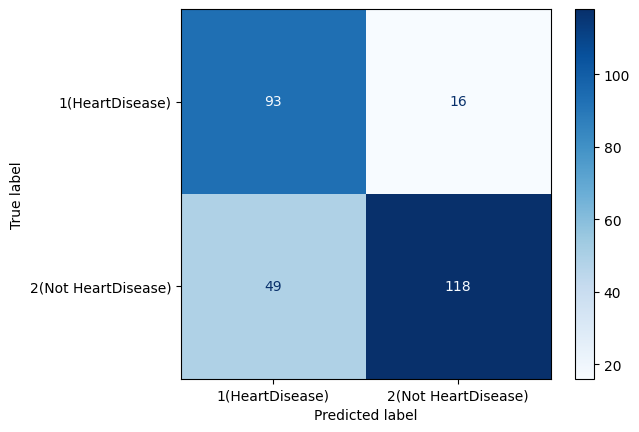

In [22]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

Top-left (True Positive, TP = 93): 93 cases were accurately classified as "HeartDisease."

Top-right (False Negative, FN = 16): 16 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

Bottom-left (False Positive, FP = 49): 49 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

Bottom-right (True Negative, TN = 118): 118 cases were correctly classified as "Not HeartDisease."

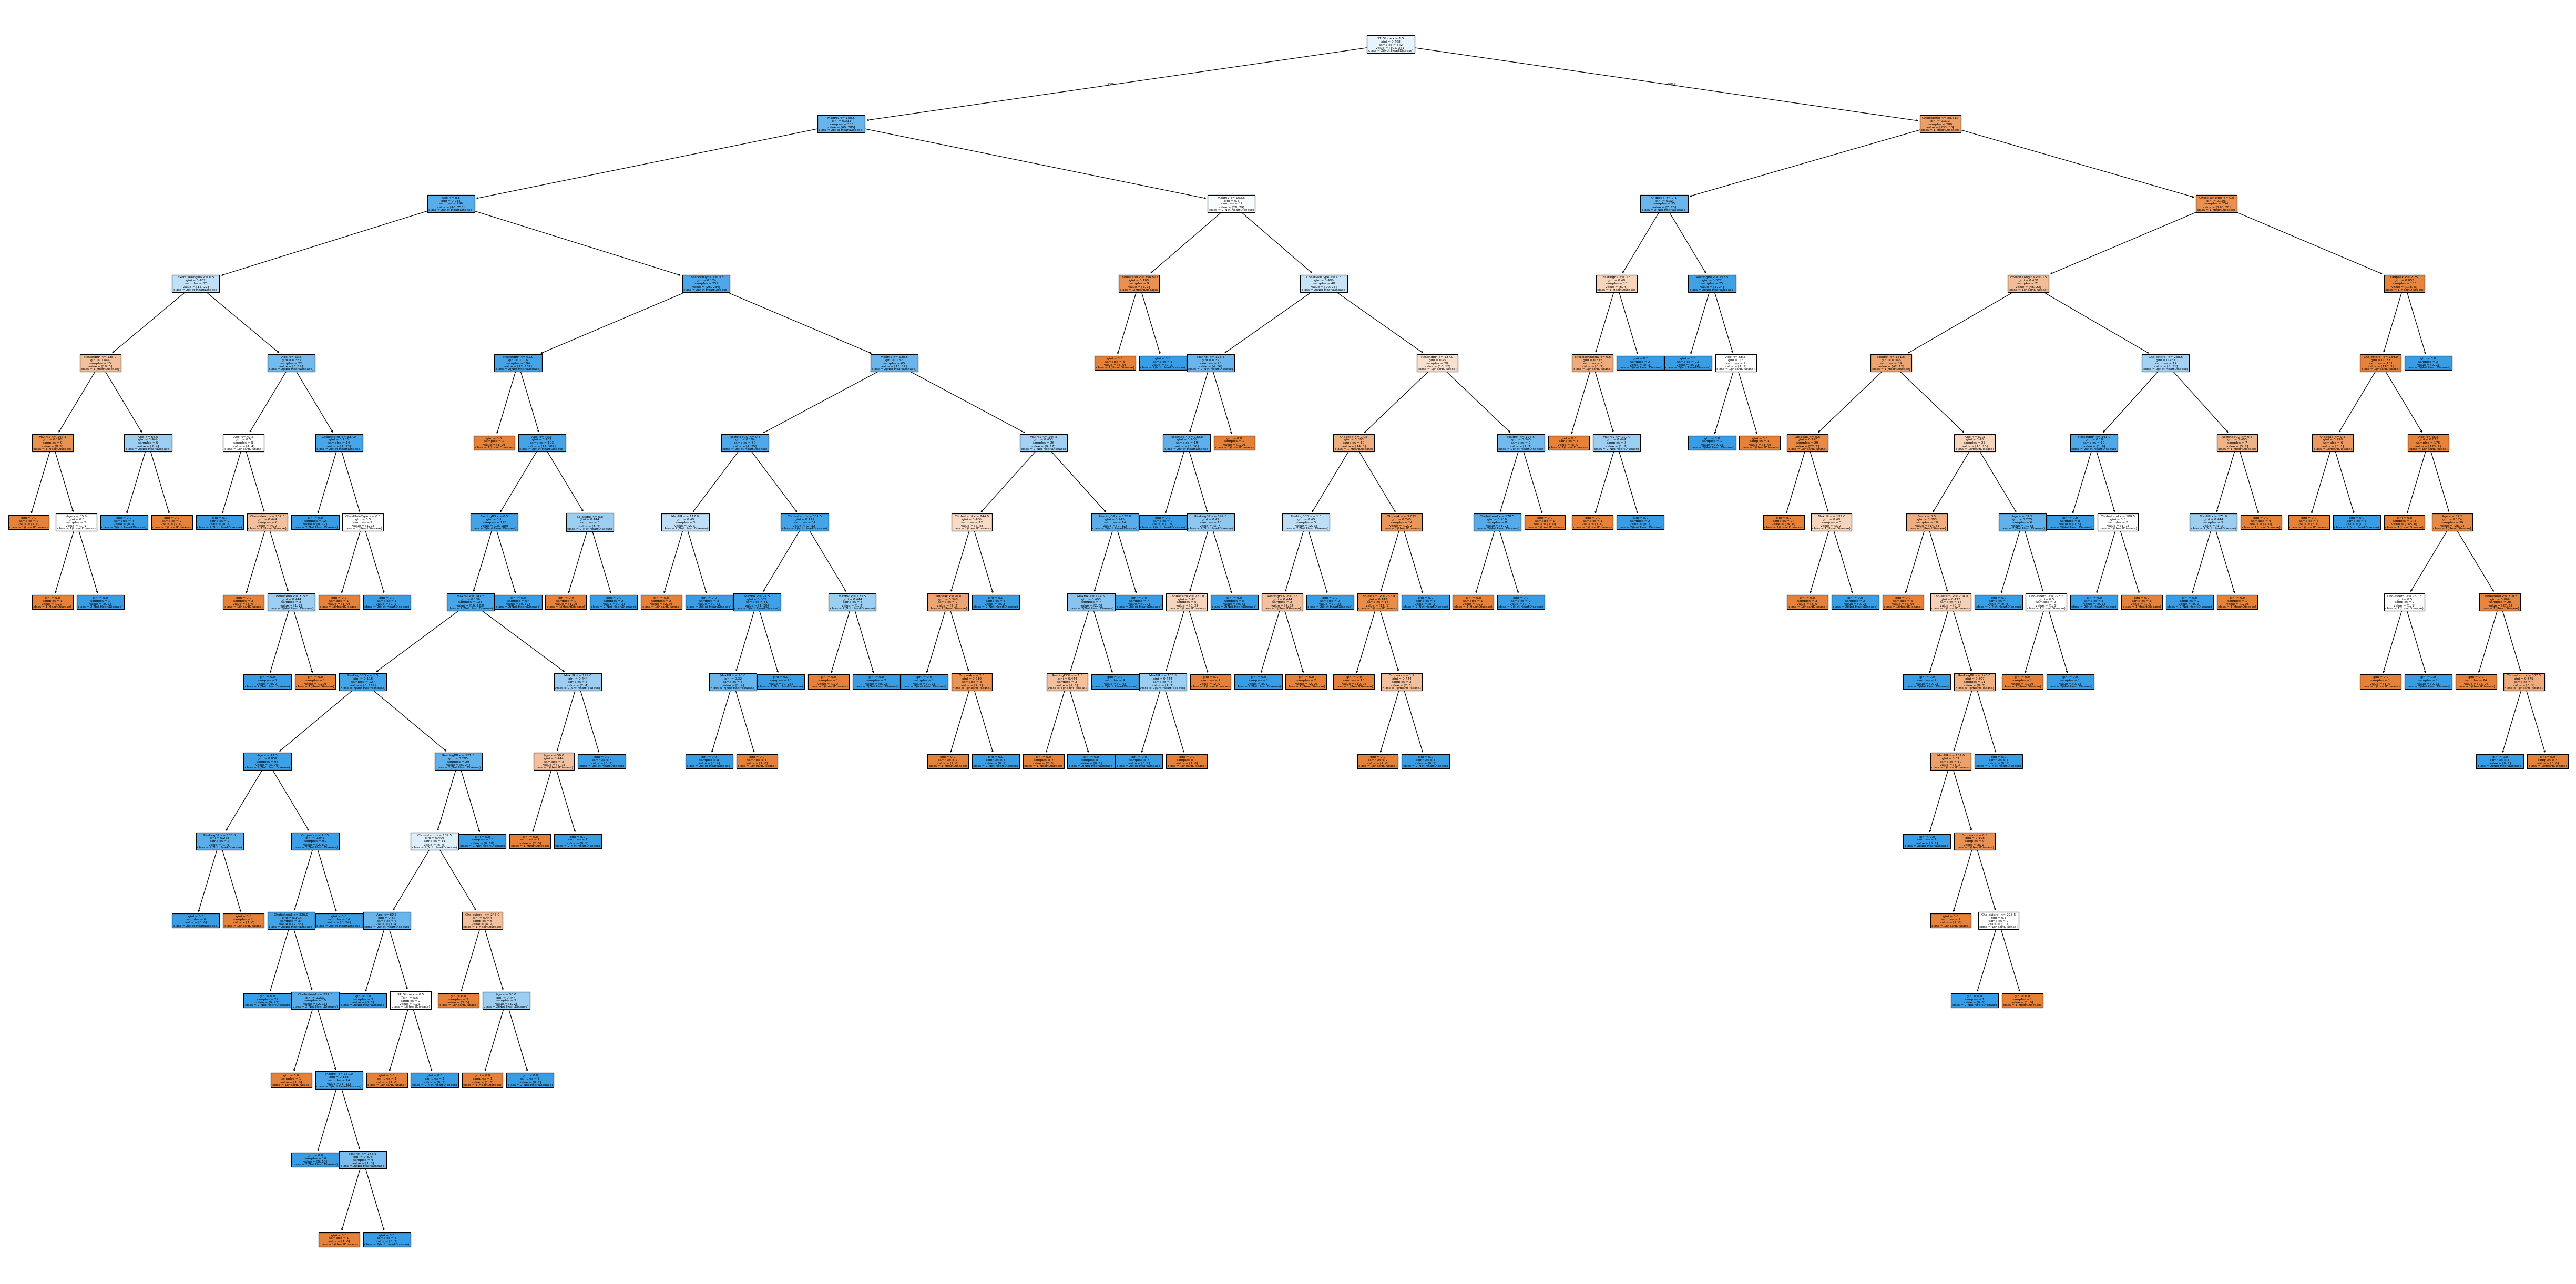

In [23]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)


class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

tree.plot_tree(clf4,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[2]],
               filled=True
               )

plt.show()

In [ ]:


from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[ 93  16]
 [ 49 118]]
Accuracy: 0.7644927536231884
Error Rate: 0.23550724637681164
Sensitivity: 0.7065868263473054
Specificity: 0.8532110091743119
Precision: 0.8805970149253731


Accuracy:

Represents how many of the model’s predictions were correct out of all predictions made. The model achieved an accuracy of 76.45%, meaning it correctly classified approximately three-quarters of the cases.

Error Rate:

Shows the proportion of predictions that were incorrect. The model’s error rate is 23.55%, indicating that a little under one-quarter of predictions were misclassified.

Sensitivity (Recall):

Indicates how effectively the model identifies true heart disease cases. With a sensitivity of 70.66%, the model successfully detects most positive cases, though some true positives are still missed.

Specificity:

Measures the model’s ability to correctly identify individuals without heart disease. The specificity is 85.32%, showing strong performance in recognizing true negatives.

Precision:

Reflects the proportion of positive predictions that were actually correct. A precision of 88.06% indicates that when the model predicts heart disease, it is accurate the vast majority of the time.

Overall Outcomes:

The model delivers a consistent overall accuracy of 76.45%.

Its 70.66% sensitivity shows reasonable ability to detect heart disease cases.

A high 85.32% specificity demonstrates reliability in identifying individuals without the condition.

The strong precision of 88.06% highlights dependable positive predictions.


Splitting Data into: 60% Training and 40% Test:

In [24]:

from sklearn.tree import DecisionTreeClassifier

# Split data into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[[128  25]
 [ 56 159]]


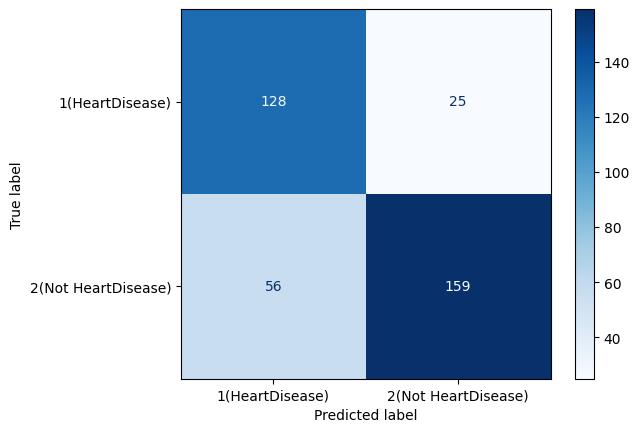

In [25]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

Top-left (True Positive, TP = 128): 128 cases were accurately classified as "HeartDisease."

Top-right (False Negative, FN = 25): 25 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

Bottom-left (False Positive, FP = 56): 56 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

Bottom-right (True Negative, TN = 159): 159 cases were correctly classified as "Not HeartDisease."

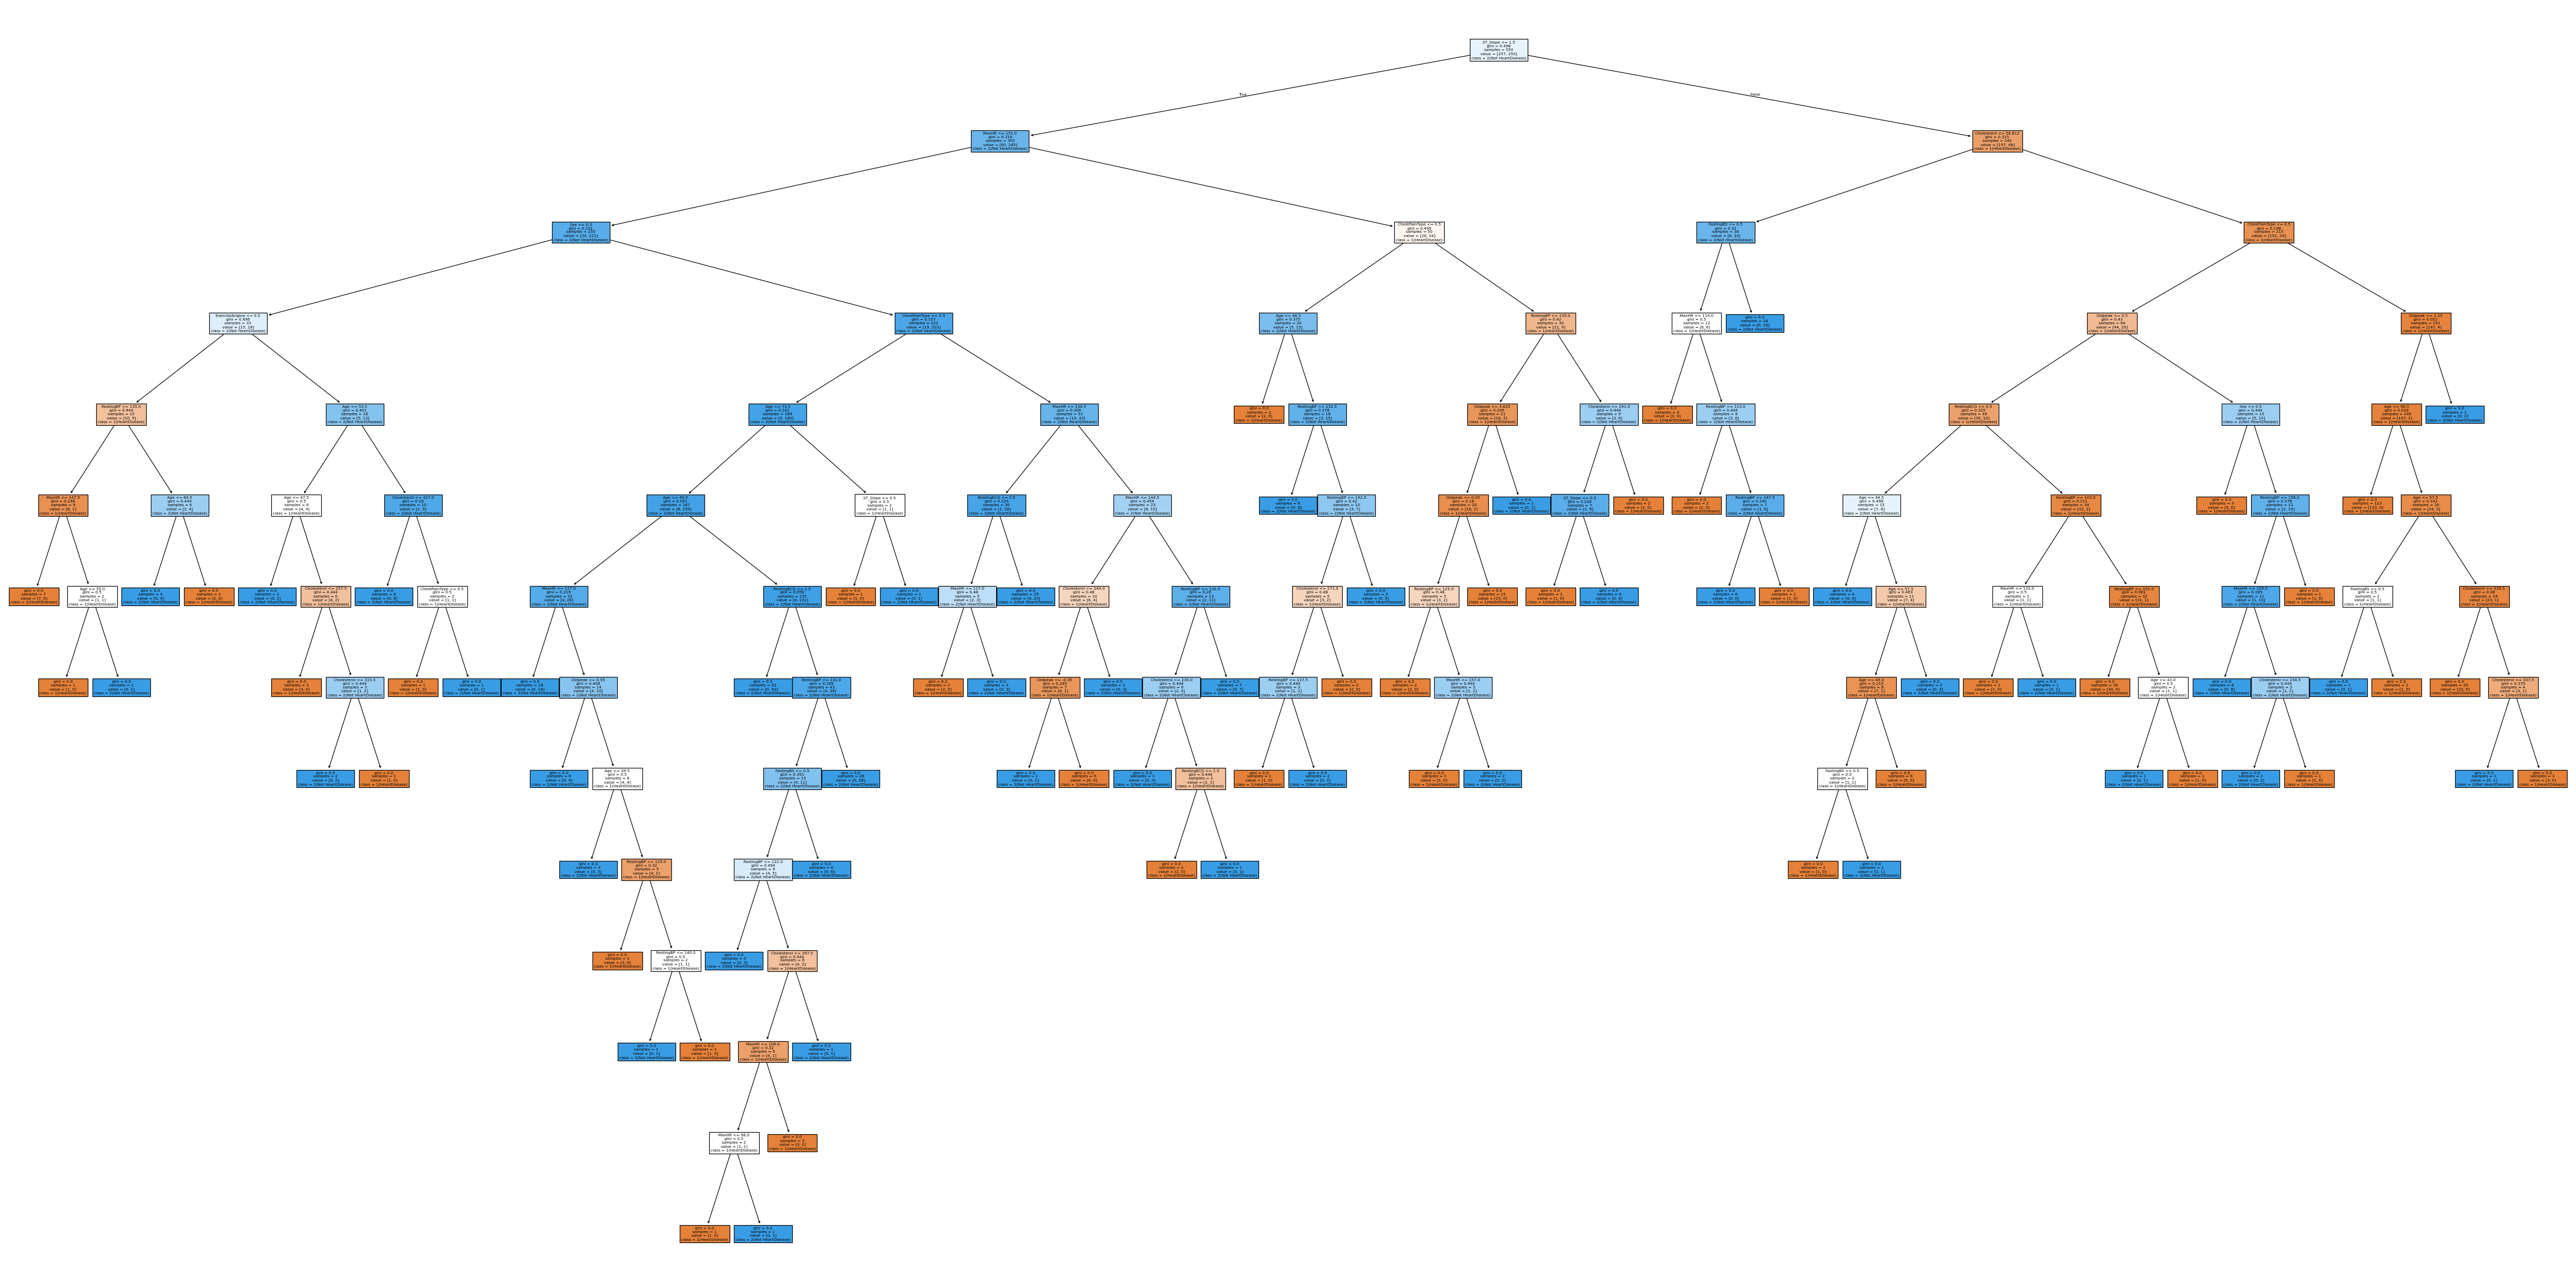

In [26]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

plot_tree(clf,
          feature_names=X.columns,
          class_names=[class_labels[1], class_labels[2]],
          filled=True
          )

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[128  25]
 [ 56 159]]
Accuracy: 0.779891304347826
Error Rate: 0.22010869565217395
Sensitivity: 0.7395348837209302
Specificity: 0.8366013071895425
Precision: 0.8641304347826086


Accuracy:

Shows the percentage of all predictions the model classified correctly. The model achieved an accuracy of 77.99%, meaning it correctly predicted nearly 78% of all cases.

Error Rate:

Represents the share of predictions that were incorrect. The error rate is approximately 22.01%, indicating that about one-fifth of predictions were misclassified.

Sensitivity (Recall):

Measures how well the model detects actual heart disease cases. With a sensitivity of 73.95%, the model successfully identifies most true positive cases, though some are still missed.

Specificity:

Indicates the model’s ability to correctly recognize cases without heart disease. The specificity of 83.66% demonstrates strong performance in detecting true negatives.

Precision:

Shows the proportion of positive predictions that were accurate. The precision score of 86.41% means that when the model predicts heart disease, it is correct the vast majority of the time.

Overall Outcomes:

The model performs well overall, with an accuracy of 77.99%.

Its sensitivity of 73.95% indicates reliable detection of true heart disease cases.

The specificity of 83.66% shows strong ability to classify individuals who do not have the condition.

The high precision (86.41%) highlights that the model’s positive predictions are very dependable.

Splitting Data into: 80% Training and 20% Test:

In [27]:

from sklearn.tree import DecisionTreeClassifier

#Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[[62 12]
 [31 79]]


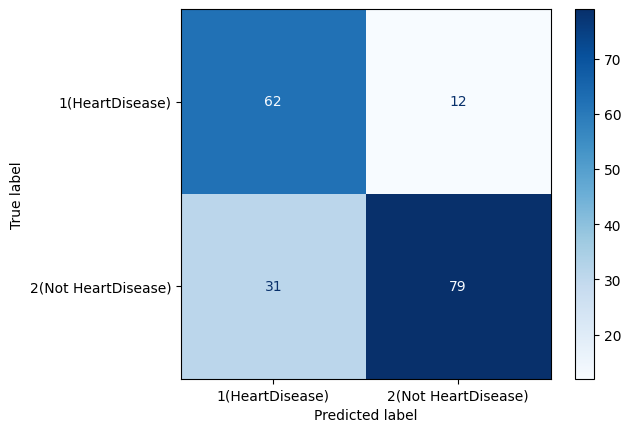

In [28]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

Top-left (True Positive, TP = 62): 62 cases were accurately classified as "HeartDisease."

Top-right (False Negative, FN = 12): 12 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

Bottom-left (False Positive, FP = 31): 31 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

Bottom-right (True Negative, TN = 79): 79 cases were correctly classified as "Not HeartDisease."

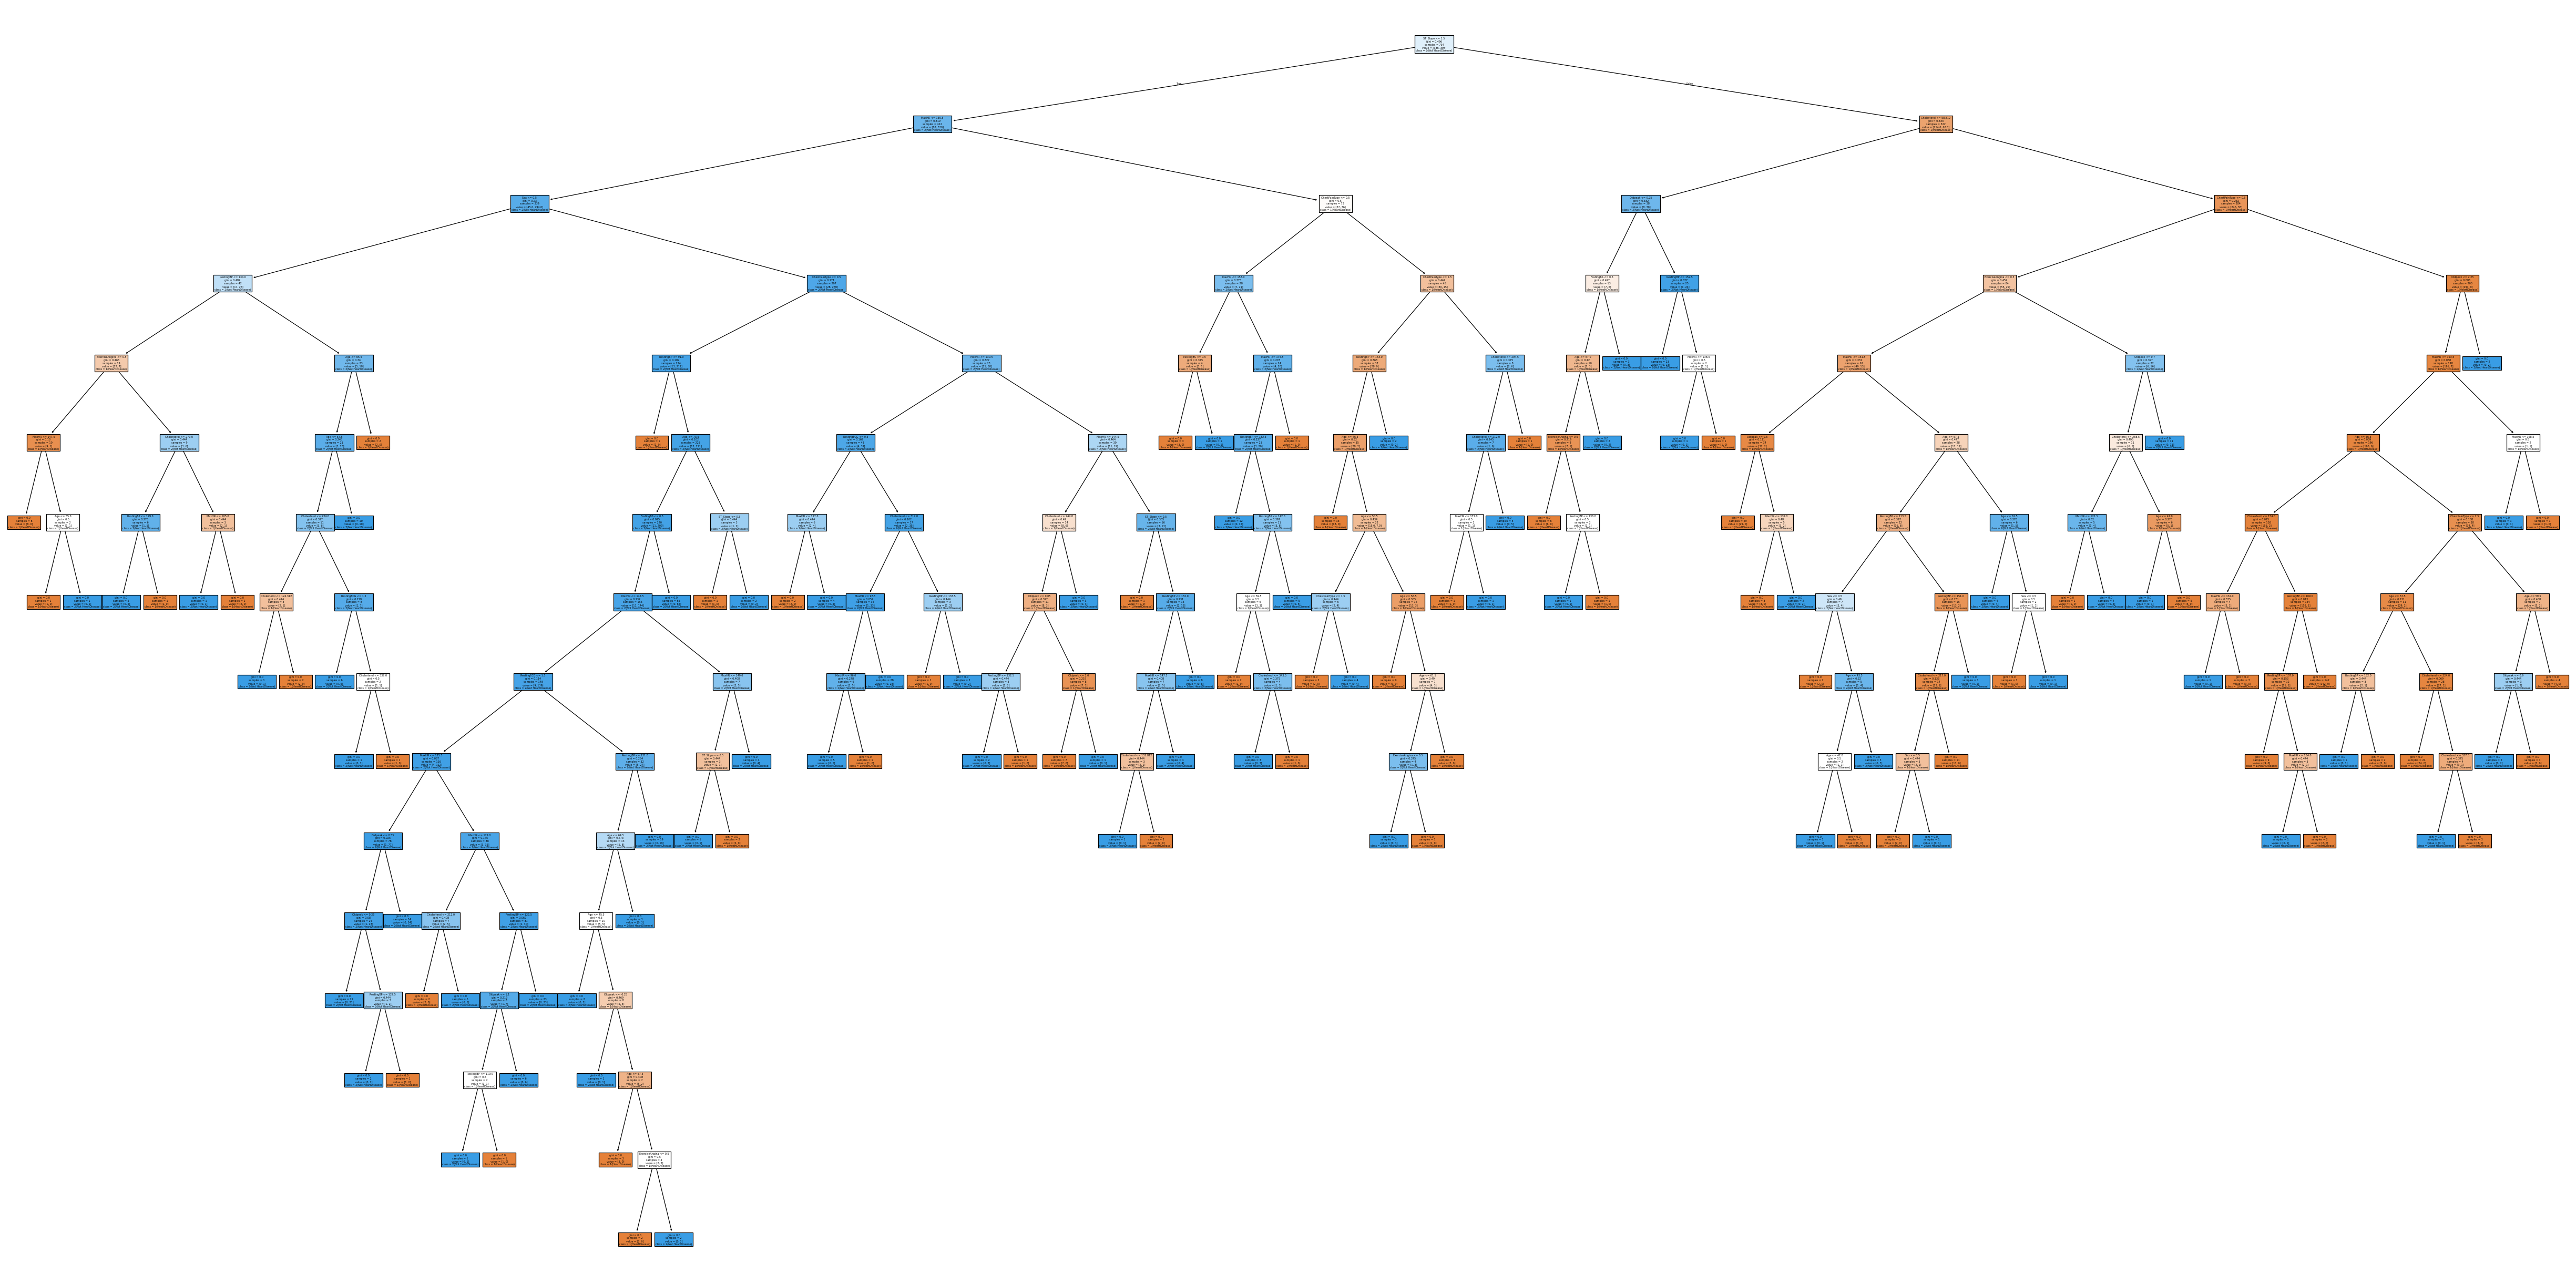

In [29]:


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

plot_tree(clf,
          feature_names=X.columns,
          class_names=[class_labels[1], class_labels[2]],
          filled=True
           )

plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[62 12]
 [31 79]]
Accuracy: 0.7663043478260869
Error Rate: 0.23369565217391308
Sensitivity: 0.7181818181818181
Specificity: 0.8378378378378378
Precision: 0.8681318681318682


Accuracy:

Represents the proportion of total predictions the model classified correctly. The model achieved an accuracy of 76.63%, meaning it correctly predicted just over three-quarters of all cases.

Error Rate:

Indicates the percentage of predictions that were incorrect. The model’s error rate is 23.37%, showing that about one-quarter of predictions were misclassified.

Sensitivity (Recall):

Shows how effectively the model identifies true heart disease cases. With a sensitivity of 71.82%, the model successfully captures most positive cases, although some true positives are missed.

Specificity:

Measures the model’s ability to correctly classify individuals who do not have heart disease. The specificity is 83.78%, demonstrating strong performance in recognizing true negatives.

Precision:

Reflects the proportion of positive predictions that were actually correct. The precision score of 86.81% indicates that when the model predicts heart disease, it is accurate the vast majority of the time.

Overall Outcomes:

The model shows solid overall accuracy (76.63%).

With 71.82% sensitivity, it reliably identifies many true heart disease cases.

Its 83.78% specificity highlights effectiveness in recognizing individuals without the condition.

A high precision of 86.81% means the model’s positive predictions are highly trustworthy.

# Clustering

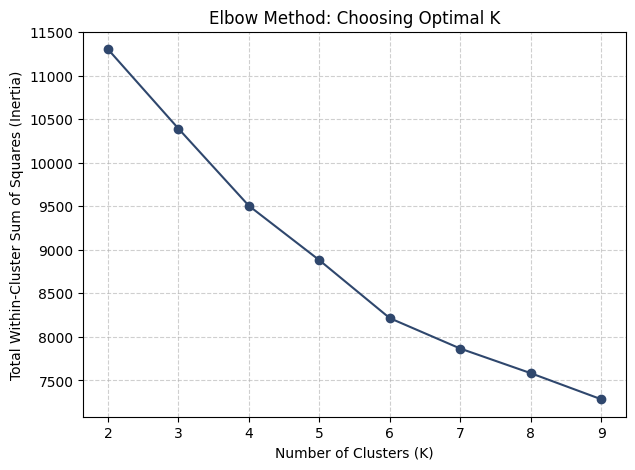

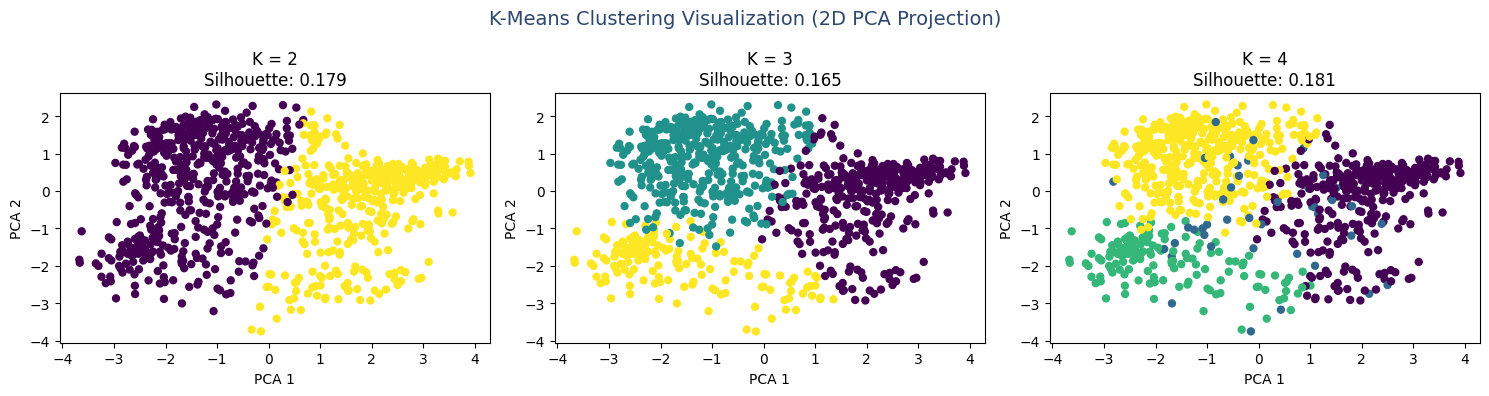

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

file_path_options = [
    "/content/sample_data/Preprocced_data (1).csv"

]
file_path = next((p for p in file_path_options if os.path.exists(p)), None)
if not file_path:
    raise FileNotFoundError("Dataset not found. Place 'Preprocessed_dataset.csv' next to the notebook.")

df = pd.read_csv(file_path)

if "HeartDisease" in df.columns:
    df = df.drop(columns=["HeartDisease"])

df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

inertias = []
K_values = range(2, 10)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_values, inertias, marker='o', color='#2F476D')
plt.title("Elbow Method: Choosing Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Total Within-Cluster Sum of Squares (Inertia)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

chosen_K = [2, 3, 4]
silhouette_scores = []

for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(round(sil_score, 3))

results_df = pd.DataFrame({
    "Number of Clusters (K)": chosen_K,
    "Silhouette Score": silhouette_scores
})

def highlight_best(s):
    is_max = s == s.max()
    return ['background-color: #b0d6b3; font-weight: bold' if v else '' for v in is_max]

styled = (
    results_df.style
    .hide(axis="index")
    .set_caption(" K-Means Clustering Evaluation")
    .set_table_styles([
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("font-weight", "bold"), ("color", "#2F476D"), ("padding", "10px")]},
        {"selector": "th", "props": [("background-color", "#2F476D"), ("color", "white"), ("padding", "8px"), ("text-align", "center")]},
        {"selector": "td", "props": [("padding", "6px"), ("text-align", "center"), ("border", "1px solid #ddd")]},
        {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f8f8f8")]}
    ])
    .apply(highlight_best, subset=["Silhouette Score"], axis=0)
)

display(styled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 4))
for i, k in enumerate(chosen_K, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    plt.subplot(1, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=25)
    plt.title(f"K = {k}\nSilhouette: {round(silhouette_score(X_scaled, labels), 3)}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
plt.suptitle("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14, color="#2F476D")
plt.tight_layout()
plt.show()